# Notebook 1 - Basic Functions of GemGIS

<img src="../data/Test1/task1.png" width="500">

# Import Libraries

In [1]:
import sys
sys.path.append('../../gemgis')
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import gemgis as gg

print(gg)

<module 'gemgis' from '../../gemgis\\gemgis.py'>


# Read Vector Files - Polygons

# Read Vector Files - Points

In [2]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

Text(67.07213566869567, 0.5, 'Y')

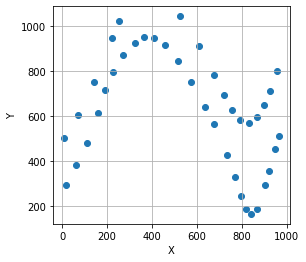

In [3]:
interfaces.plot()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

In [4]:
interfaces.crs

{'init': 'epsg:4326'}

In [5]:
interfaces.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [6]:
interfaces.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


## Extract X,Y coordinates

In [7]:
interfaces = gg.extract_xy_values(interfaces)
interfaces.head()

,id,formation,geometry,X,Y
0,None,Ton,POINT (19.150 293.313),19.150128,293.313485
1,None,Ton,POINT (61.934 381.459),61.934367,381.459326
2,None,Ton,POINT (109.358 480.946),109.357860,480.945568
3,None,Ton,POINT (157.812 615.999),157.812299,615.999430
4,None,Ton,POINT (191.318 719.094),191.318028,719.093981


# Load Vector Data - LineString

In [8]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')

Text(86.43459798221053, 0.5, 'Y')

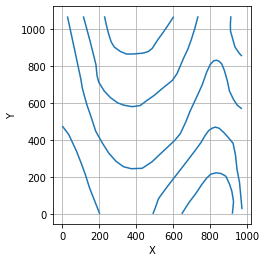

In [9]:
topo.plot()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

In [10]:
topo.crs

{'init': 'epsg:4326'}

In [11]:
topo.geom_type.head()

0    LineString
1    LineString
2    LineString
3    LineString
4    LineString
dtype: object

In [12]:
topo.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


## Extract X,Y coordinates

In [13]:
topo = gg.extract_xy_values(topo)
topo.head()

,id,Z,geometry,points,X,Y
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(0.7408806771479846, 475.44101474698454)",0.740881,475.441015
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(35.62873136073459, 429.2469161566801)",35.628731,429.246916
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(77.30033078835194, 340.0890755208477)",77.300331,340.089076
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(104.75836141895252, 269.34426719024157)",104.758361,269.344267
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(127.04782157791061, 207.64445718500974)",127.047822,207.644457


# Read Digital Elevation Model

In [14]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
dem

<open DatasetReader name='../../gemgis/data/Test1/raster1.tif' mode='r'>

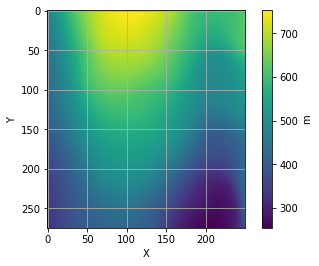

In [15]:
plt.imshow(dem.read(1))
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()
cbar.set_label('m')

In [16]:
dem.crs

CRS.from_dict(init='epsg:4326')

In [17]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

In [18]:
interfaces = gg.extract_z_values(interfaces, dem)
interfaces.head()

,id,formation,geometry,X,Y,Z
0,None,Ton,POINT (19.150 293.313),19.150128,293.313485,364.994873
1,None,Ton,POINT (61.934 381.459),61.934367,381.459326,400.343597
2,None,Ton,POINT (109.358 480.946),109.357860,480.945568,459.549316
3,None,Ton,POINT (157.812 615.999),157.812299,615.999430,525.691040
4,None,Ton,POINT (191.318 719.094),191.318028,719.093981,597.632507


Text(67.07213566869567, 0.5, 'Y')

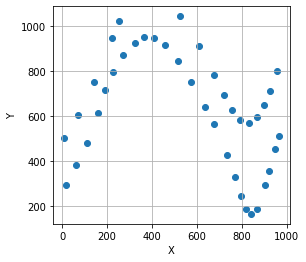

In [19]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
interfaces.plot()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

In [20]:
interfaces = gg.extract_coordinates(interfaces, dem)
interfaces.head()

,id,formation,geometry,X,Y,Z
0,None,Ton,POINT (19.150 293.313),19.150128,293.313485,364.994873
1,None,Ton,POINT (61.934 381.459),61.934367,381.459326,400.343597
2,None,Ton,POINT (109.358 480.946),109.357860,480.945568,459.549316
3,None,Ton,POINT (157.812 615.999),157.812299,615.999430,525.691040
4,None,Ton,POINT (191.318 719.094),191.318028,719.093981,597.632507


In [21]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
dem

<open DatasetReader name='../../gemgis/data/Test1/raster1.tif' mode='r'>

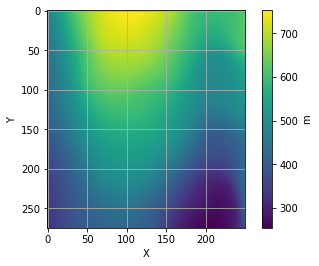

In [22]:
plt.imshow(dem.read(1))
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()
cbar.set_label('m')

In [23]:
dem.crs

CRS.from_dict(init='epsg:4326')

In [24]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
del topo['Z']
topo.head()

,id,geometry
0,None,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


Text(86.43459798221053, 0.5, 'Y')

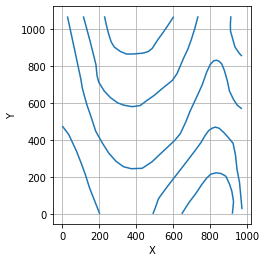

In [25]:
topo.plot()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

In [26]:
topo.crs

{'init': 'epsg:4326'}

In [27]:
dem.crs

CRS.from_dict(init='epsg:4326')

In [28]:
topo.crs == dem.crs

True

In [29]:
topo = gg.extract_coordinates(topo, dem)
topo

CRSError: CRS is invalid: None

# Save as GemPy df

In [ ]:
interfaces = gg.convert_to_gempy_df(interfaces)
interfaces.head()

In [ ]:
interfaces['dip'] = 50
interfaces['azimuth'] = 100

In [ ]:
orientations= gg.convert_to_gempy_df(interfaces)
orientations.head()

# Define Custom Sections

In [ ]:
custom_sections = gpd.read_file('../../gemgis/data/Test1/customsections1.shp')

In [ ]:
custom_sections.plot()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-100,1250)
plt.xlim(-100,1250)

In [ ]:
custom_sections.crs

In [ ]:
custom_sections.geom_type.head()

In [ ]:
custom_sections

In [ ]:
custom_sections['section_name'] = 'Section1'
custom_sections

In [ ]:
section_dict = gg.to_section_dict(custom_sections, 'section_name')
section_dict

In [ ]:
import pandas as pd
sections = pd.concat([custom_sections,custom_sections,custom_sections])
sections['section_name'].iloc[2] ='Section2'
sections['section_name'].iloc[3] ='Section2'
sections['section_name'].iloc[4] ='Section3'
sections['section_name'].iloc[5] ='Section3'
sections

In [ ]:
section_dict = gg.to_section_dict(sections, 'section_name')
section_dict

# Interpolate Raster

In [30]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
topo.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


Text(86.43459798221053, 0.5, 'Y')

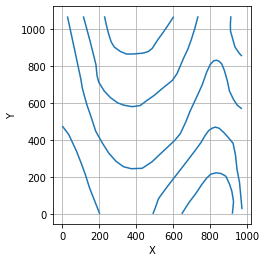

In [31]:
topo.plot()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

Text(232.61818181818177, 0.5, 'Y')

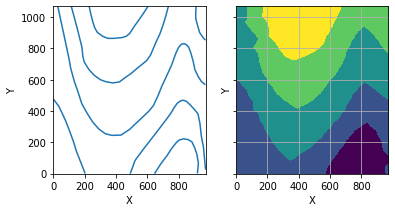

In [32]:
array = gg.interpolate_raster(topo)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(array, origin='lower')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

Text(232.61818181818177, 0.5, 'Y')

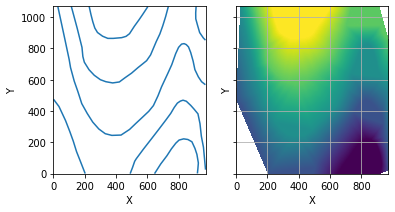

In [33]:
array = gg.interpolate_raster(topo, method = 'linear')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(array, origin='lower')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

Text(232.61818181818177, 0.5, 'Y')

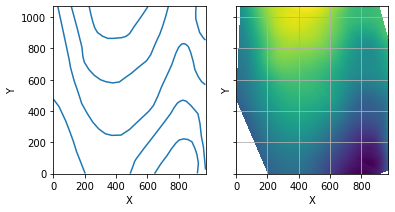

In [34]:
array = gg.interpolate_raster(topo, method = 'cubic')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(array, origin='lower')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

Text(232.61818181818177, 0.5, 'Y')

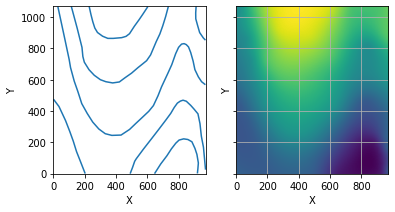

In [35]:
array = gg.interpolate_raster(topo, method = 'rbf')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(array, origin='lower')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

Text(232.61818181818177, 0.5, 'Y')

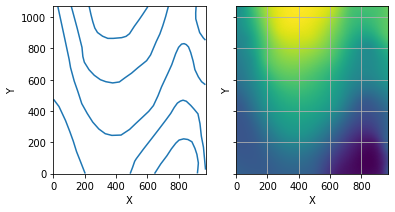

In [36]:
array = gg.interpolate_raster(topo, method = 'rbf', function = 'linear')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(array, origin='lower')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

In [37]:
array.shape

(1069, 972)

In [38]:
point = [1300, 1850]
extent = [950,array.shape[1]+950,900,array.shape[0]+900]
extent

[950, 1922, 900, 1969]

In [39]:
value = gg.sample_from_raster(array, extent, point)
value

721.12

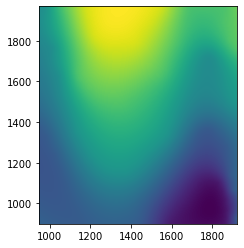

In [40]:
plt.imshow(array, origin='lower', extent = extent)

In [41]:
hillshades = gg.calculate_hillshade(array)
hillshades

array([[178.44440449, 178.46863979, 178.54882367, ..., 175.04735733,
        174.46500279, 173.91751342],
       [178.4664951 , 178.49081993, 178.5712826 , ..., 174.20053733,
        173.61946915, 173.07812945],
       [178.46249063, 178.4868057 , 178.5674493 , ..., 172.56553524,
        171.96691989, 171.42826464],
       ...,
       [116.488174  , 116.71797336, 117.03245957, ..., 187.28873847,
        187.21114732, 187.16230878],
       [113.40353031, 113.50018013, 113.66959757, ..., 186.63249745,
        186.5664723 , 186.52882889],
       [111.93089222, 111.96469869, 112.06948459, ..., 186.30138787,
        186.24142921, 186.20953884]])

Text(0, 0.5, 'Y')

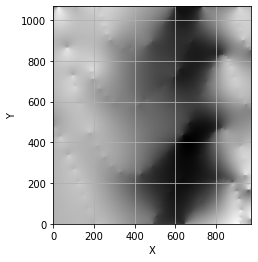

In [42]:
plt.imshow(hillshades, cmap = 'gray', origin='lower')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

In [43]:
slope = gg.calculate_slope(array)
slope

array([[11.60646528, 11.58165725, 11.54464059, ..., 54.57454279,
        54.04346334, 53.78469718],
       [11.58560947, 11.56072139, 11.52358394, ..., 54.76367789,
        54.21032777, 53.93963551],
       [11.55424196, 11.52923418, 11.49192325, ..., 54.99167915,
        54.41717264, 54.13492853],
       ...,
       [19.26656069, 19.21902884, 19.1663295 , ..., 24.33607602,
        24.29554446, 24.27665699],
       [20.1431411 , 20.13425573, 20.12349079, ..., 24.42569672,
        24.38408573, 24.36395835],
       [20.57537461, 20.58540452, 20.59504741, ..., 24.46964905,
        24.42766642, 24.40699406]])

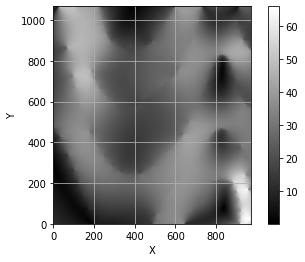

In [49]:
plt.imshow(slope, cmap = 'gray', origin='lower')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()

In [45]:
aspect = gg.calculate_aspect(array)

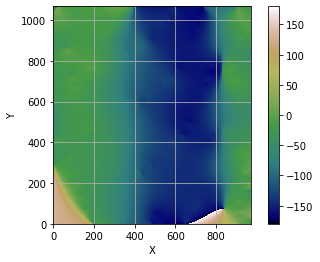

In [48]:
plt.imshow(aspect, cmap = 'gist_earth', origin='lower')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()

# Create GemPyData Object

In [ ]:
data = gg.GemPyData()
print(data.crs)

In [ ]:
data.model_name = 'Model1'
data.model_name

In [ ]:
data.crs = 'EPSG:4326'
data.crs

In [ ]:
data = gg.GemPyData(crs = 'EPSG:4326')
print(data.crs)

In [ ]:
data.interfaces = interfaces
data.interfaces.head()

In [ ]:
data.orientations = orientations
data.orientations.head()

In [ ]:
data.section_dict = section_dict
data.section_dict

In [ ]:
resolution = gg.set_resolution(50,50,50)
resolution

In [ ]:
data.resolution = resolution
data.resolution

In [ ]:
data.resolution = [50,50,50]
data.resolution

In [ ]:
extent = gg.set_extent(0,100,0,100,0,100)
extent

In [ ]:
data.extent = extent
data.extent

In [ ]:
data.extent = [0,100,0,100,0,100]
data.extent

In [ ]:
data.